<a href="https://colab.research.google.com/github/djalil21/sentiment-analysis-algerian-dialect/blob/master/DZ_TFiDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PFE/preprocess.csv')

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df.head()

,sentiment,text
0,negative,سوء هاتف !
1,negative,عيوب لي في حمي زاف اتر عيا في في اميرا لي مليح...
2,negative,صراح ميصلحش شريت دم
3,negative,خاو سمحول صح هاتف 0 ثقيل ريزو
4,negative,خي هاتف را عند و سخ زاف اش نديرل


In [7]:
df['text'].isna().sum()

9

In [8]:
df = df.dropna(axis=0)

In [9]:
df.shape

(24865, 2)

In [10]:
df.text=df.text.astype(str)

In [11]:
df.head()

,sentiment,text
0,negative,سوء هاتف !
1,negative,عيوب لي في حمي زاف اتر عيا في في اميرا لي مليح...
2,negative,صراح ميصلحش شريت دم
3,negative,خاو سمحول صح هاتف 0 ثقيل ريزو
4,negative,خي هاتف را عند و سخ زاف اش نديرل


In [12]:
df = df[df.sentiment != "neutral"]

## Tf-IDF exemple


In [13]:
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call you tomorrow?']

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(documents)
tfidf.get_feature_names_out()       

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [14]:
doc_array=tfidf.transform(documents)
doc_array.toarray()

array([[0.55528266, 0.        , 0.        , 0.43779123, 0.        ,
        0.55528266, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.43779123],
       [0.        , 0.        , 0.37796447, 0.        , 0.37796447,
        0.        , 0.        , 0.37796447, 0.        , 0.        ,
        0.75592895, 0.        ],
       [0.        , 0.48693426, 0.        , 0.        , 0.        ,
        0.        , 0.61761437, 0.        , 0.61761437, 0.        ,
        0.        , 0.        ],
       [0.        , 0.46580855, 0.        , 0.46580855, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.59081908,
        0.        , 0.46580855]])

In [15]:
frequency_matrix=pd.DataFrame(doc_array.toarray(),columns=tfidf.get_feature_names_out())

In [16]:
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,0.555283,0.000000,0.000000,0.437791,0.000000,0.555283,0.000000,0.000000,0.000000,0.000000,0.000000,0.437791
1,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000,0.000000,0.377964,0.000000,0.000000,0.755929,0.000000
2,0.000000,0.486934,0.000000,0.000000,0.000000,0.000000,0.617614,0.000000,0.617614,0.000000,0.000000,0.000000
3,0.000000,0.465809,0.000000,0.465809,0.000000,0.000000,0.000000,0.000000,0.000000,0.590819,0.000000,0.465809


# train and test

In [17]:
df['sentiment'] = df.sentiment.map({"negative":0,"positive":1})
df.shape

(15319, 2)

In [18]:
df['sentiment'].value_counts()

1    9743
0    5576
Name: sentiment, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['sentiment'],test_size=0.2)                                                   

In [20]:

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))


Number of rows in the total set: 15319
Number of rows in the training set: 12255
Number of rows in the test set: 3064


In [21]:

# Instantiate the TfidfVectorizer method
tfidf = TfidfVectorizer(max_features=20000)

# Fit the training data and then return the matrix
x_train = tfidf.fit_transform(x_train.astype('U').values) # Fit will make it as dictionry of words

# Transform testing data and return the matrix. Note we are not fitting the testing data into the TfidfVectorizer()
x_test = tfidf.transform(x_test.astype('U').values)


In [22]:
frequency_matrix=pd.DataFrame(x_train.toarray(),columns=tfidf.get_feature_names_out())
frequency_matrix

,00,001,004,01,02,03,04,05,06,0663264968,...,ﻳﻨﺴﻰ,ﻳﻨﻄﻠﻘﻮﻥ,ﻳﻨﻈﺮ,ﻳﻮﺟﺪ_ﻛﺜﻴﺮ,ﻳﻮﺟﻬﻬﺎ,ﻷن,ﻻخر,ﻻد,ﻻن,ﻻﻳﻚ_ﺟﻴﻢ_ﻣﺸﺎﺭﻛﺓ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine learning

In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score


clf = svm.SVC()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
print("DS1 svm acc ",accuracy_score(y_test, pred))

DS1 svm acc  0.8462793733681462


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
print("DS1 Random Forest ",accuracy_score(y_test, pred))

logreg = LogisticRegression()
clf = LogisticRegression()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
print("DS1 Logistic Regression acc ",accuracy_score(y_test, pred))


DS1 Random Forest  0.8090731070496083
DS1 Logistic Regression acc  0.83322454308094


In [25]:
clf = BernoulliNB()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
print("DS1 BernoulliNB acc ",accuracy_score(y_test, pred))

DS1 BernoulliNB acc  0.7973237597911227


# LSTM

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [27]:
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session
from keras.models import load_model

In [28]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
print("vocab size:",len(tokenizer.word_index))
X = pad_sequences(X, padding='post', maxlen=300)

Y = np.asarray(df.sentiment.values).astype('float32') 

vocab size: 23626


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training:", len(x_train))
print("Testing: ", len(x_test))

Training: 12255
Testing:  3064


In [30]:
#create LSTM model with keras
embedding_dim = 300
dropout = 0.5
opt = 'adam'
clear_session()
model = Sequential()
model.add(layers.Embedding(input_dim=20000, 
                           output_dim=150, 
                           input_length=300))
model.add(layers.Bidirectional(layers.LSTM(150, dropout=0.5, 
                                           recurrent_dropout=0.5, 
                                           return_sequences=True)))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 150)          3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 300, 300)         361200    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 300)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               38528     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [31]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss_val, accuracy_val = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/10
192/192 [==============================] - 583s 3s/step - loss: 0.5615 - accuracy: 0.7048 - val_loss: 0.3992 - val_accuracy: 0.8163
Epoch 2/10
192/192 [==============================] - 561s 3s/step - loss: 0.3271 - accuracy: 0.8767 - val_loss: 0.3605 - val_accuracy: 0.8453
Epoch 3/10
192/192 [==============================] - 539s 3s/step - loss: 0.2087 - accuracy: 0.9284 - val_loss: 0.3764 - val_accuracy: 0.8424
Epoch 4/10
192/192 [==============================] - 524s 3s/step - loss: 0.1328 - accuracy: 0.9572 - val_loss: 0.5265 - val_accuracy: 0.8430
Epoch 5/10
192/192 [==============================] - 540s 3s/step - loss: 0.0986 - accuracy: 0.9705 - val_loss: 0.6017 - val_accuracy: 0.8384
Epoch 6/10
192/192 [==============================] - 561s 3s/step - loss: 0.0765 - accuracy: 0.9768 - val_loss: 0.7606 - val_accuracy: 0.8378
Epoch 7/10
192/192 [==============================] - 554s 3s/step - loss: 0.0642 - accuracy: 0.9838 - val_loss: 0.7804 - val_accuracy: 0.8332

In [32]:
metrics_df = pd.DataFrame(history.history)

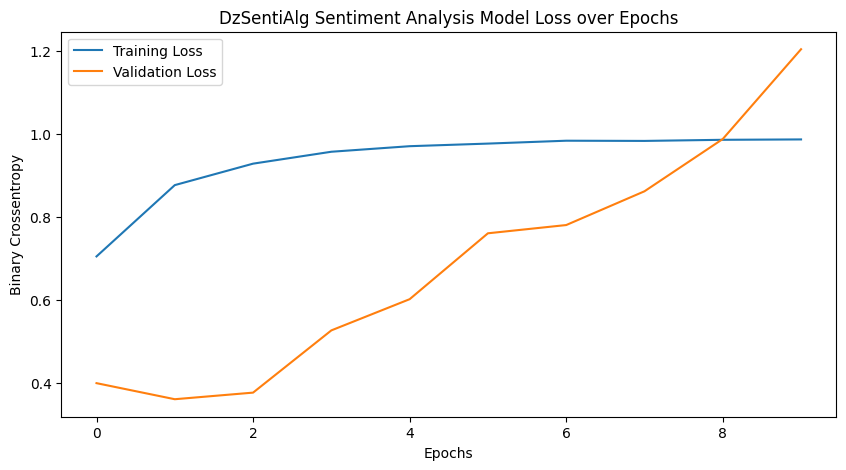

In [33]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('DzSentiAlg Sentiment Analysis Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()